# 밑바닥부터 시작하는 딥러닝
### 4장 신경망 학습

#### 오차제곱합

In [3]:
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t= [0,0,1,0,0,0,0,0,0,0] #원-핫 인코딩

오차제곱합은 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차(yk-tk)를 제곱한 후, 그 총합을 구한 것.

In [4]:
def sum_squares_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [6]:
import numpy as np
sum_squares_error(np.array(y),np.array(t))

0.09750000000000003

In [7]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y),np.array(t))

0.5975

오차가 작은 첫번째 예가 정답에 더 가까운 것으로 판단 가능

#### 교차 엔트로피 오차

In [9]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

#delta를 더해주는 이유는 log에 0이 들어가면 -무한대가 출력 되는 것을 막기 위한 것

In [10]:
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t= [0,0,1,0,0,0,0,0,0,0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [11]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))


2.302584092994546

#### 미니배치 학습: 많은 데이터 중 일부를 무작위로 추려서 그 근사치로 이용할 수 있다. 여기서 무작위로 추려진 데이터를 미니배치라고 함.

In [16]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) #원-핫

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [18]:
train_size= x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size, batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

In [20]:
np.random.choice(60000,10)

array([53038, 14748, 36620, 46217, 36867,  4690, 47158, 24660, 35826,
        5420])

(배치용) 교차 엔트로피 오차 구현하기

In [22]:
def cross_entropy_error(y, t):
    if y.dim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size= y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size



In [ ]:
#원-핫 인코딩이 아닌 경우
'''
def cross_entropy_error(y, t):
    if y.ndim ==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
'''

손실 함수를 설정하는 이유: 신경망을 학습할 때 정확도를 지표로 삼게 되면 우리가 찾으려는 매개변수의 미분이 대부분의 장소에서 0이 되기 때문에 손실 함수를 설정한다.

#### 수치 미분

In [25]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [28]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

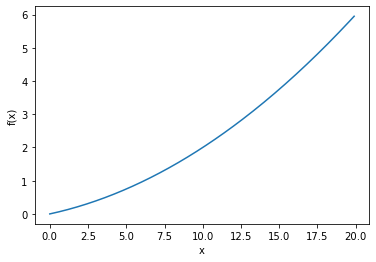

In [29]:
import matplotlib.pylab as plt

x=np.arange(0.0,20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [30]:
numerical_diff(function_1,5)

0.1999999999990898

In [31]:
numerical_diff(function_1, 10)

0.2999999999986347

##### 편미분

In [33]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [34]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [35]:
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [38]:
def function_tmp2(x1):
    return 3.0**2.0+x1*x1

In [39]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

나머지 변수는 고정하고 해당순서의 변수로만 미분하는 것. ---- 다음시간에 기울기 + 경사하강법 할듯